In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy.optimize import curve_fit
from pathlib import Path
from sklearn.preprocessing import scale, StandardScaler

In [2]:
# Assigning directories
Filepath = Path.cwd() / "DataSolution"
Figpath = Path.cwd() / "Graphiques"

# Setting default plot parameters
plt.style.use("https://raw.githubusercontent.com/dccote/Enseignement/master/SRC/dccote-errorbars.mplstyle")

In [143]:
def getPCA(data):
    df_st =  StandardScaler().fit_transform(data)
    pd.DataFrame(df_st, columns=df.columns)
    pca_out = PCA().fit(df_st)
    pca_out.explained_variance_ratio_
    #pd.DataFrame(df_st, columns=df.columns)
    #loadings = np.array(pca.components_.T) * np.sqrt(pca.explained_variance_)
    #loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'])

def straightLine(X, m, b):
    return m*X + b

def curvefit(dataX, dataY, function):
        popt, pcov = curve_fit(function, dataX, dataY)
        nbPoint = len(dataX)
        newDataX = np.linspace(dataX[0], dataX[-1], nbPoint)
        newDataY = function(newDataX, *popt)
        perr = np.sqrt(np.diag(pcov))
        deltaValues = []
        for i in range(len(perr)):
            deltaValues.append(perr[i])
        return newDataX, newDataY, deltaValues, popt

def getCoefficientsWithPCA(data):
    pca = PCA(n_components=1)
    principalCoefficients = pca.fit_transform(data)
    principalComponents = np.array(pca.components_.T)
    inverse = np.linalg.pinv(principalComponents)
    moy = np.array(pca.mean_)
    m = moy@inverse
    coefs = principalCoefficients + m
    explainedVariance = pca.explained_variance_ratio_
    #print(sum(explainedVariance)) # value=0.9942653114936244
    coefficients = []
    for i in coefs:
        coefficients.append(i[0])
    coefficients = np.array(coefficients)
    return coefficients

In [346]:
λ, _ = np.loadtxt(Filepath/'0%50ms.txt', skiprows=14, delimiter=',', unpack=True)

Counts = []
for i in Path.iterdir(Filepath):
    df = pd.read_csv(i, sep=",", skiprows=14, names=["λ", "Counts"])
    count = df.iloc[:,1][40:81]
    #count = count.to_numpy(dtype=float, copy=False)
    #_ , Count = np.loadtxt(i, skiprows=14, delimiter=",", unpack=True)
    #count = pd.DataFrame(count).T
    Counts.append(count)

#print(Counts[0])
scaler = StandardScaler()
df = pd.DataFrame(Counts)

np. set_printoptions(suppress=True)
ScaledCount=Counts.copy()
df_st = scaler.fit_transform(ScaledCount)
ScaledCount=pd.DataFrame(scaler.fit_transform(ScaledCount), columns=df.columns)
ScaledCount.head()

,40,41,42,43,44,45,46,47,48,49,...,71,72,73,74,75,76,77,78,79,80
0,-1.035013,-1.291529,-1.355243,-1.332861,-1.326044,-1.413405,-1.363048,-1.396762,-1.371281,-1.391746,...,-1.517475,-1.439808,-1.474338,-1.226075,-1.193632,-1.198409,-1.673815,-0.752147,-1.045013,-0.917581
1,-1.846317,-1.143668,-0.976311,-0.835360,-0.707347,-0.553525,-0.516522,-0.465476,-0.475608,-0.473774,...,0.000650,-0.086600,-0.345118,-1.518932,-1.371583,-1.697546,-1.057174,-1.478485,-1.595637,-1.654605
2,0.675886,0.935038,0.965675,1.002144,1.051639,1.059676,1.046090,1.016863,1.042809,1.046898,...,0.936984,0.906295,0.836513,1.017459,-0.482862,-0.199555,-0.087872,-0.025809,0.056233,-0.706828
3,-0.215716,-0.520969,-0.577082,-0.637852,-0.671180,-0.700592,-0.710868,-0.672557,-0.700881,-0.695283,...,-0.699340,-0.701694,-0.555223,-0.251020,1.295614,0.399525,0.087945,1.063434,0.134959,0.872595
4,0.981095,1.598091,1.622033,1.654646,1.645588,1.601418,1.646090,1.680226,1.640647,1.632088,...,1.664242,1.758633,1.834475,1.114511,-0.126960,0.798718,0.440605,-0.843005,-0.101219,0.661842


In [335]:
pca = PCA(n_components=1)
principalCoefficients = pca.fit_transform(df_st)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
#loadings_df

In [340]:
pca = PCA(n_components=1)
principalCoefficients = pca.fit_transform(df)
Components = pca.inverse_transform(principalCoefficients)
Components = pd.DataFrame(Components).T
#Components.shape
Components

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,27079.858683,27978.516916,29029.251262,30388.114440,31860.306162,33080.314520,34158.570181,35349.060149,36375.751064,37534.745786,...,3976.964630,3184.172314,2807.963344,2705.763021,2698.378446,2714.596690,2711.106730,2723.042393,2770.055516,2784.361357
1,28692.664477,29628.607126,30722.935371,32138.176399,33671.447859,34942.073123,36065.064514,37304.946700,38374.233976,39581.314209,...,4631.254853,3805.570391,3413.752893,3307.312383,3299.621429,3316.512552,3312.877797,3325.308658,3374.272308,3389.171684
2,30634.874369,31632.013858,32797.895023,34305.671934,35939.196723,37292.902132,38489.320590,39810.272777,40949.475664,42235.481134,...,5000.203579,4120.531535,3703.094954,3589.694805,3581.500976,3599.496530,3595.624115,3608.867771,3661.032921,3676.906497
3,28169.077657,29095.409451,30178.500437,31579.208869,33096.735721,34354.313396,35465.773196,36692.923483,37751.230637,38945.915802,...,4354.745906,3537.540097,3149.746031,3044.398519,3036.786541,3053.504216,3049.906784,3062.209998,3110.670857,3125.417237
4,31537.778934,32559.008623,33753.056671,35297.260429,36970.250048,38356.660043,39581.983144,40934.848622,42101.573863,43418.648336,...,5283.792225,4382.867913,3955.346353,3839.206534,3830.814749,3849.245062,3845.279093,3858.842707,3912.268130,3928.525200
5,28266.317069,29196.739478,30284.613318,31691.507180,33215.735324,34478.866373,35595.234301,36827.803597,37890.784160,39090.744971,...,4346.822908,3526.008376,3136.501839,3030.689120,3023.043528,3039.835027,3036.221710,3048.579253,3097.254112,3112.065611


In [341]:
Components.to_numpy(dtype=float, copy=False)

array([[27079.85868274, 27978.51691575, 29029.25126168, 30388.11443958,
        31860.3061621 , 33080.31452043, 34158.57018094, 35349.06014947,
        36375.75106394, 37534.74578568, 38342.17325342, 39357.19425438,
        40082.61733428, 40300.00005595, 40317.52760532, 39751.58775789,
        38890.41043814, 37416.64621024, 35208.49268756, 32846.06108682,
        29698.90368567, 26001.44771452, 22180.23827139, 18260.44089167,
        14583.85537884, 11520.52383031,  9381.10602542,  7869.67582176,
         6791.02739084,  5774.28584026,  4862.36086098,  3976.96463015,
         3184.17231419,  2807.96334368,  2705.76302107,  2698.37844596,
         2714.59669044,  2711.10673027,  2723.04239303,  2770.05551605,
         2784.36135722],
       [28692.66447675, 29628.60712562, 30722.93537061, 32138.17639934,
        33671.44785872, 34942.07312268, 36065.0645136 , 37304.9466998 ,
        38374.23397582, 39581.31420948, 40422.24102143, 41479.37421111,
        42234.89435659, 42461.29606623,

ValueError: x and y must be the same size

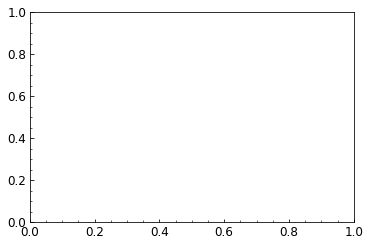

In [342]:
concentration = np.array([0, 2.5, 7.5, 10, 15, 20])
plt.scatter(Components, concentration, alpha=0.2)
#plt.scatter(Components[:, 0], Components[:, 1], alpha=0.8)
dataX, dataY, deltaValues, popt = curvefit(Components, concentration, straightLine)

In [179]:
pca = PCA(n_components=3)
principalCoefficients = pca.fit_transform(df_st)
principalCoefficients

array([[-8.72002052,  1.61353181,  1.10763287],
       [-2.60312683,  4.14869574, -1.04485107],
       [ 5.69624244,  1.01170786,  0.69952326],
       [-3.75263559, -1.9785161 , -0.60460859],
       [ 9.61875731,  0.73500215,  0.04235254],
       [-3.02713349, -3.44460921, -0.1436811 ],
       [ 2.78791667, -2.08581224, -0.05636791]])

In [ ]:
concentration = np.array([0, 2.5, 7.5, 10, 15, 20])
dataX, dataY, deltaValues, popt = curvefit(coefficients, concentration, straightLine)